In [57]:
import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.insert(0, '/scratch/fivanovic/Work/X-SH/eigenstate_plotting')
import XSH_eigenstates_Filip as XSF

In [58]:
def find_dissociation_index(iterable, population_threshold, post_dissoc_elements):

    for outer_index in range(len(iterable)):

        if iterable[outer_index] < population_threshold:

            for inner_val in iterable[outer_index: outer_index + post_dissoc_elements]:

                if inner_val > population_threshold:
                    
                    fluctuation = True
                    break

                else:
                    fluctuation = False

            if not fluctuation:

                return outer_index

In [59]:
def block_statistics(observable_array, number_blocks):
    
    block_means = np.zeros((number_blocks, len(observable_array[0])))

    number_trajectories = len(observable_array)
    trajectories_per_block = number_trajectories//number_blocks

    for block_index in range(number_blocks):
        block_means[block_index, :] = np.mean(observable_array[block_index*trajectories_per_block: block_index*trajectories_per_block + trajectories_per_block,:] ,axis = 0)

    final_block_mean = np.mean(block_means, axis = 0)
    final_block_sd = np.std(block_means, axis = 0)

    return final_block_mean, final_block_sd

In [90]:
file_marker = 'physopt'
analysis_path = f'/scratch/fivanovic/X-SH/T6-PDI/production_runs/energy_landscape/{file_marker}_t_dependent_eigens'
nuclear_timestep = 0.05

In [96]:
xt_ct_ratios = np.loadtxt(analysis_path + f'/ratios/{file_marker}_xt_ct_ratio_array.txt')
ict_d1a2_ratios = np.loadtxt(analysis_path + f'/ratios/{file_marker}_ict_d1a2_ratio_array.txt')
ict_d2a1_ratios = np.loadtxt(analysis_path + f'/ratios/{file_marker}_ict_d2a1_ratio_array.txt')

xt_ct_couplings = np.loadtxt(analysis_path + f'/couplings/{file_marker}_xt_ct_coupling_array.txt')
ict_d1a2_couplings = np.loadtxt(analysis_path + f'/couplings/{file_marker}_ict_d1a2_coupling_array.txt')
ict_d2a1_couplings = np.loadtxt(analysis_path + f'/couplings/{file_marker}_ict_d2a1_coupling_array.txt')

(array([5.36003902e-02, 8.12076560e-02, 2.46038357e-02, 5.33465638e-03,
        1.31032059e-03, 3.86157036e-04, 1.34724817e-04, 5.45392031e-05,
        2.55652514e-05, 1.30261043e-05]),
 array([1.38344355e-05, 5.99986248e+00, 1.19997111e+01, 1.79995598e+01,
        2.39994084e+01, 2.99992570e+01, 3.59991057e+01, 4.19989543e+01,
        4.79988030e+01, 5.39986516e+01, 5.99985002e+01]),
 <BarContainer object of 10 artists>)

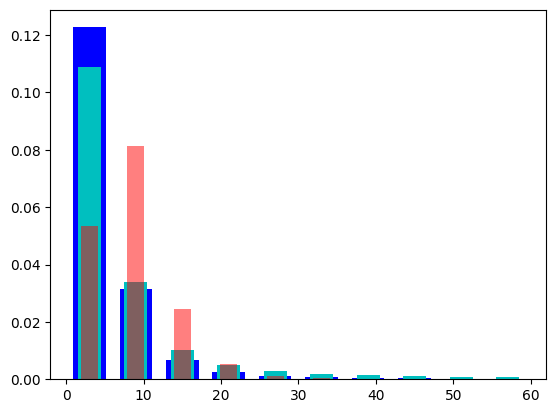

In [92]:
xt_ct_mean, xt_ct_sd = block_statistics(xt_ct_ratios, 6)
ict_d1a2_mean, ict_d1a2_sd = block_statistics(ict_d1a2_ratios, 6)
ict_d2a1_mean, ict_d2a1_sd = block_statistics(ict_d2a1_ratios, 6)

simulation_time = np.arange(len(ict_d1a2_mean))*nuclear_timestep*10

#plt.plot(simulation_time, xt_ct_mean, color = 'k', label = 'iXT-iCT', linewidth = 0.2)
#plt.plot(simulation_time, ict_d1a2_mean, color = 'r', label = 'iCT - d1a2', linewidth = 0.075)
#plt.plot(simulation_time, ict_d2a1_mean, color = 'b', label = 'iCT - d2a1')
#plt.ylim([0,1000])

xt_ct_moderate_indices = np.where(xt_ct_ratios.flatten() < 60)[0]
ict_d1a2_moderate_indices = np.where(ict_d1a2_ratios.flatten() < 60)[0]
ict_d2a1_moderate_indices = np.where(ict_d2a1_ratios.flatten() < 60)[0]

plt.hist(xt_ct_ratios.flatten()[xt_ct_moderate_indices], color = 'b', rwidth = 0.7, density = True)
plt.hist(ict_d1a2_ratios.flatten()[ict_d1a2_moderate_indices], color = 'c', rwidth = 0.5, density = True)
plt.hist(ict_d2a1_ratios.flatten()[ict_d2a1_moderate_indices], color = 'r', rwidth = 0.37, density = True, alpha = 0.5)

(array([1.16670966e-06, 2.59347980e-05, 2.38658923e-04, 1.17978394e-03,
        4.33161892e-03, 1.06325458e-02, 1.39289014e-02, 5.81633267e-03,
        4.24664505e-04, 6.98244562e-06]),
 array([-220.09815174, -192.76573299, -165.43331425, -138.1008955 ,
        -110.76847675,  -83.436058  ,  -56.10363926,  -28.77122051,
          -1.43880176,   25.89361699,   53.22603573]),
 <BarContainer object of 10 artists>)

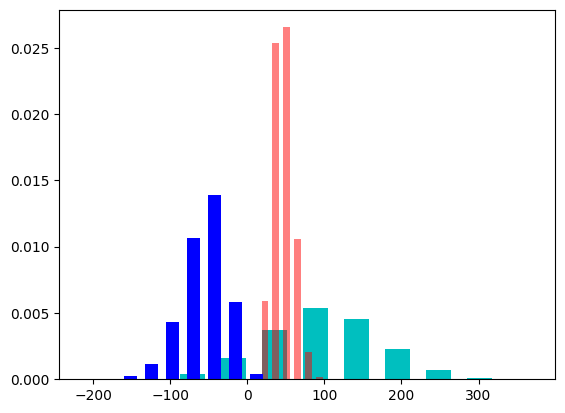

In [99]:
plt.hist(ict_d1a2_couplings.flatten(), color = 'c', rwidth = 0.6, density = True)
plt.hist(ict_d2a1_couplings.flatten(), color = 'r', rwidth = 0.6, density = True, alpha = 0.5)
plt.hist(xt_ct_couplings.flatten(), color = 'b', rwidth = 0.6, density = True)

In [93]:
total_xt_ct_mean = np.mean(xt_ct_mean)
total_ict_d1a2_mean = np.mean(ict_d1a2_mean)
total_ict_d2a1_mean = np.mean(ict_d2a1_mean)

print('XT-CT coupling avg:', total_xt_ct_mean)
print('iCT-d1a2 coupling avg:', total_ict_d1a2_mean)
print('iCT-d2a1 coupling avg:', total_ict_d2a1_mean)

XT-CT coupling avg: 17.475401844882423
iCT-d1a2 coupling avg: 27.576358669268483
iCT-d2a1 coupling avg: 8.619399304486928


In [94]:
vecs = XSF.build_lattice(4,1,5)
dons, accs = XSF.DA_index(vecs, 2)
nearest_neighbours = XSF.build_connectivity(vecs, 5)

CT_states = XSF.define_CT_states(dons, accs)
XT_states = XSF.define_XT_states(accs)

H_CT = XSF.build_CT_block(CT_states, vecs, nearest_neighbours, -822.84, 400/total_ict_d2a1_mean, 400/total_ict_d1a2_mean, -1e-3)
H_XT = XSF.build_XT_block(XT_states[:1], nearest_neighbours, 50, 0)
H_XT_CT = XSF.build_XT_CT_block(XT_states[:1], CT_states, nearest_neighbours, 390/total_xt_ct_mean)

H = XSF.build_full_Hamiltonian(H_CT, H_XT, H_XT_CT)
eigenvals, eigenvecs = XSF.get_eigen(H)

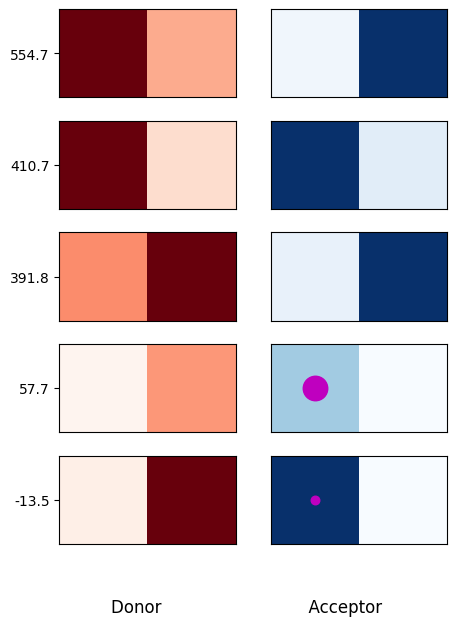

In [95]:
CT_site_population_list = [XSF.CT_site_populations(vector, dons, accs) for vector in eigenvecs.T]

donor_site_pops = [site[0] for site in CT_site_population_list]
acceptor_site_pops = [site[1] for site in CT_site_population_list]

XT_site_population_list = [XSF.XT_site_populations(vector, XT_states[:1]) for vector in eigenvecs.T]

fig, axs = XSF.plot_eigenspectrum(donor_site_pops, acceptor_site_pops, XT_site_population_list, figure_size = (5,7), max_shading = 0.3, exciton_radius=350, eigenvals=eigenvals)

In [77]:
eigenstate_energies = np.loadtxt(analysis_path + f'/eigenstate_populations/{file_marker}_eigenstate_energy_array.txt')
eigenstate_XT = np.loadtxt(analysis_path + f'/eigenstate_populations/{file_marker}_eigenstate_XT_array.txt')
eigenstate_iXT = np.loadtxt(analysis_path + f'/eigenstate_populations/{file_marker}_eigenstate_iXT_array.txt')
eigenstate_iCT = np.loadtxt(analysis_path + f'/eigenstate_populations/{file_marker}_eigenstate_iCT_array.txt')
eigenstate_nCT = np.loadtxt(analysis_path + f'/eigenstate_populations/{file_marker}_eigenstate_nCT_array.txt')
eigenstate_CT = np.loadtxt(analysis_path + f'/eigenstate_populations/{file_marker}_eigenstate_CT_array.txt')

simulation_time = np.arange(len(eigenstate_CT[0]))*nuclear_timestep*10

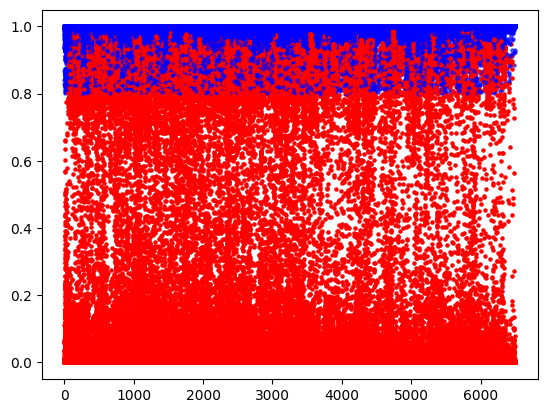

In [67]:
for index in range(len(eigenstate_XT)):

    XT_dissociation_index = find_dissociation_index(eigenstate_XT[index], 0.2, 100)
    dissociated_XT = eigenstate_XT[index][XT_dissociation_index:]
    dissociated_simulation_time = np.arange(len(dissociated_XT))*10*nuclear_timestep

    over_indices = np.where(dissociated_XT > 0.8)[0]
    under_indices = np.where(dissociated_XT < 1)[0]
    hybrid_indices = np.intersect1d(over_indices, under_indices)

    hybrid_XT = dissociated_XT[hybrid_indices]
    hybrid_times = dissociated_simulation_time[hybrid_indices]

    dissociated_iXT = eigenstate_iXT[index][XT_dissociation_index:]
    dissociated_iCT = eigenstate_iCT[index][XT_dissociation_index:]

    hybrid_iXT = dissociated_iXT[hybrid_indices]
    hybrid_iCT = dissociated_iCT[hybrid_indices]

    if np.any(hybrid_indices):

        plt.scatter(hybrid_times, hybrid_XT, color = 'b', s = 5, alpha = 0.6)
        plt.scatter(hybrid_times, hybrid_iXT, color = 'r', s = 5)

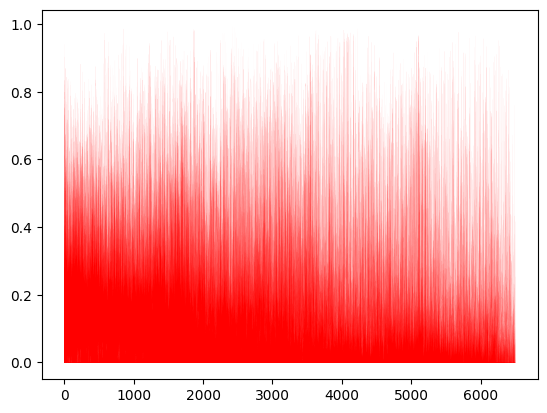

In [68]:
for index in range(len(eigenstate_XT)):

    shading_parameter = 1 - index/len(eigenstate_XT)

    XT_dissociation_index = find_dissociation_index(eigenstate_XT[index], 0.2, 100)
    dissociated_quantity = eigenstate_nCT[index][XT_dissociation_index:]

    dissociated_simulation_time = np.arange(len(dissociated_quantity))*10*nuclear_timestep

    plt.plot(dissociated_simulation_time, dissociated_quantity, color = 'r', alpha = shading_parameter, linewidth = 0.03)